In [29]:
%run cleanData.ipynb
%run cleanData_test.ipynb

In [30]:
#Import libraries
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

In [31]:
#Convert data into float to be used in our algorithm

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df_train=clean_dataset(df_train)
df_test =clean_dataset(df_test)

In [32]:
#We are using 80-20 split for train-test
VALID_SIZE = 0.2
#We also use random state for reproducibility
RANDOM_STATE = 2018

train, valid = train_test_split(df_train, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [33]:
df_train

,age,gender,scentLover,ecoInterest,washDishes,MrPropre,Antikal,Ariel,Dash,pods,...,likesPets,hasPet,daysSinceActivity,nbChildren,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount
0,0.077922,1.0,0.000000,0.388626,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.9,1.0,0.234694,0.2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.636364,1.0,0.378981,0.666667,1.0,1.0,1.0,1.0,-1.0,1.0,...,0.3,-1.0,0.014914,0.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.350649,1.0,0.000000,0.666667,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,0.9,1.0,0.094976,0.2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0.220779,1.0,0.333333,0.333333,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,0.9,1.0,0.259812,0.4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.259740,1.0,0.378981,0.000000,-1.0,1.0,1.0,1.0,1.0,-1.0,...,0.9,1.0,0.116954,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.454545,1.0,0.378981,0.388626,1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,0.9,1.0,0.000785,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11996,0.324675,1.0,0.333333,0.333333,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.9,1.0,0.124019,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11997,0.311688,1.0,0.378981,0.666667,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.9,1.0,0.018838,0.6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11998,0.272727,-1.0,0.378981,0.388626,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.9,1.0,0.197017,0.2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


First, we define the predictors variables, then the target variable to predict

In [34]:
predictors = ['age',
'gender',
'scentLover',
'ecoInterest',
'MrPropre',
'Antikal',
'Ariel',
'Dash',
'pods',
'powder',
'liquid',
'electricToothbrush',
'likesPets',
'hasPet',
'daysSinceActivity',
'nbChildren',
'magasin',
'moyenneSurface',
'superMarket',
'hyperMarket',
'drive',
'hardDiscount']
target = 'washDishes'

In [35]:
train_X = train[predictors]
train_Y = train[target].values
valid_X = valid[predictors]
valid_Y = valid[target].values


Implementation of RandomForest Algorithm

In [36]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

In [37]:

clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [38]:
#Training of the model
clf.fit(train_X, train_Y)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [39]:
#Validation of the model on the remaining 20% of the training set
preds = clf.predict(valid_X)


In [40]:
preds.shape

(2400,)

In [41]:
#In order to better understand the importance of each variable, we want to plot the features importance.
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

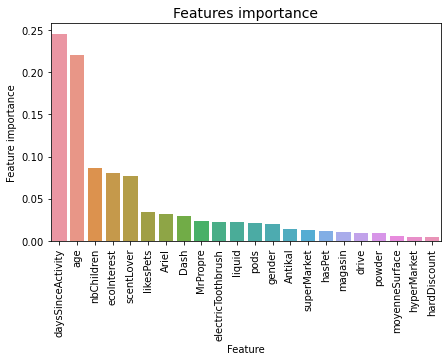

In [42]:
plot_feature_importance()

'daysSinceActivity' and 'Age' are the two most important features in the prediction.

Evaluation of our model

In [43]:
clf.score(train_X, train_Y)
acc = round(clf.score(train_X, train_Y) * 100, 2)
print("RandomForest accuracy (train set):", acc)

RandomForest accuracy (train set): 99.98


In [44]:

clf.score(valid_X, valid_Y)
acc = round(clf.score(valid_X, valid_Y) * 100, 2)
print("RandomForest accuracy (validation set):", acc)

RandomForest accuracy (validation set): 59.83


In [45]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.63      0.77      0.69      1418
    Survived       0.51      0.35      0.42       982

    accuracy                           0.60      2400
   macro avg       0.57      0.56      0.56      2400
weighted avg       0.58      0.60      0.58      2400



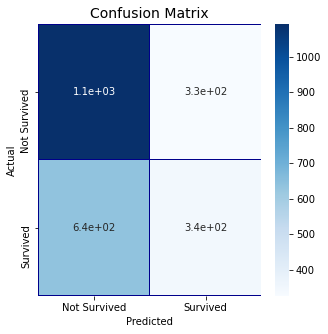

In [46]:
def plot_confusion_matrix():
    cm = pd.crosstab(valid_Y, preds, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

plot_confusion_matrix()

In [47]:
Use of our model in the test dataset to submit on Kaggle

SyntaxError: invalid syntax (<ipython-input-47-6cc6f36a9e70>, line 1)

In [20]:
prediction_test = clf.predict(df_test)

In [21]:
prediction_test[:10]

array([-1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.])

In [22]:
#As we have drop the userId column, we have to add it again next to the predicted values for the column "washDishes" so we get the userId again from the data set test.
df_test_full = pd.read_csv(r"DS_CentraleSupelec_ST42021/DS_CentraleSupelec_test.csv")

In [23]:
result_prediction = pd.DataFrame(prediction_test, columns =['WashDishes'])

In [24]:
result_prediction['WashDishes']

0      -1.0
1       1.0
2      -1.0
3       1.0
4       1.0
       ... 
3995   -1.0
3996   -1.0
3997    1.0
3998   -1.0
3999   -1.0
Name: WashDishes, Length: 4000, dtype: float64

In [25]:
submit = pd.concat([df_test_full['userId'],result_prediction['WashDishes']], axis=1)
submit.shape

(4000, 2)

In [26]:
submit

,userId,WashDishes
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,-1.0
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,1.0
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,-1.0
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,1.0
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,1.0
...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,-1.0
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,-1.0
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,1.0
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,-1.0


In [27]:
#Formatting the submit data to fit the submission format expected by Kaggle.
submit.rename(columns={"washDishes": "WashDishes"})

submit['WashDishes'] = submit['WashDishes'].apply(lambda e: 'Auto' if e == 1 else 'Hand')
submit

,userId,WashDishes
0,use_yFJKoOUCJ7ED8c8Xeov1TzdfpRL,Hand
1,use_t1WpMt2fprbjEteXNSZ1TzdyvAi,Auto
2,use_w9jT58WcsP3tUkPCA0A1TzgYdeE,Hand
3,use_onifqa3LnOsjZOhPYfN1TzdfkfA,Auto
4,use_KgP1NlkmR24pbU9KRwK1Tzdqm8u,Auto
...,...,...
3995,use_yXWhQEP4R6vvYOeJzz61TZU7JRs,Hand
3996,use_MafnxsXODJV5oVhfi1h1TzdgYQT,Hand
3997,use_Pbui34WhFhPjNeX6TEz1TzdZdVv,Auto
3998,use_sDxhHoOEzHyrAzWSPnM1TzdYVjB,Hand


In [28]:
submit.to_csv('./DS_CentraleSupelec_ST42021/submit_final.csv', index=False)  